# Wine Quality Prediction

In this Machine Learning project, we will predict the quality of wine based on given features.

In [68]:
# import all needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [69]:
df = pd.read_csv('WineQT.csv')

In [70]:
# check the first few rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [71]:
# explore the type of data present in each of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [72]:
# check the descriptive statistical measures of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


## Exploratory Data Analysis

In [73]:
# check the number of null values column wise
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

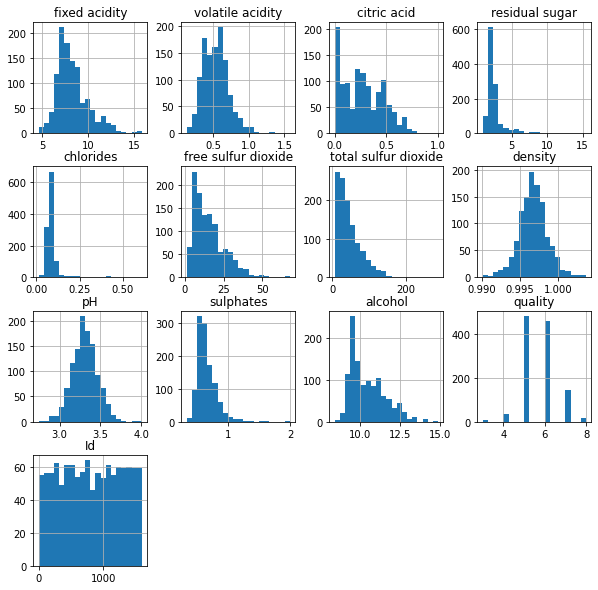

In [74]:
# draw a histogram to visualise the distribution of the data with continuous values in 
# the columns of the dataset
df.hist(bins=20, figsize=(10, 10))
plt.show()

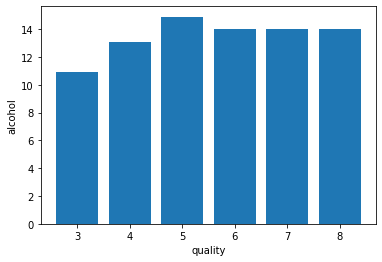

In [75]:
# draw the count plot to visualise the number data for each quality of wine
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

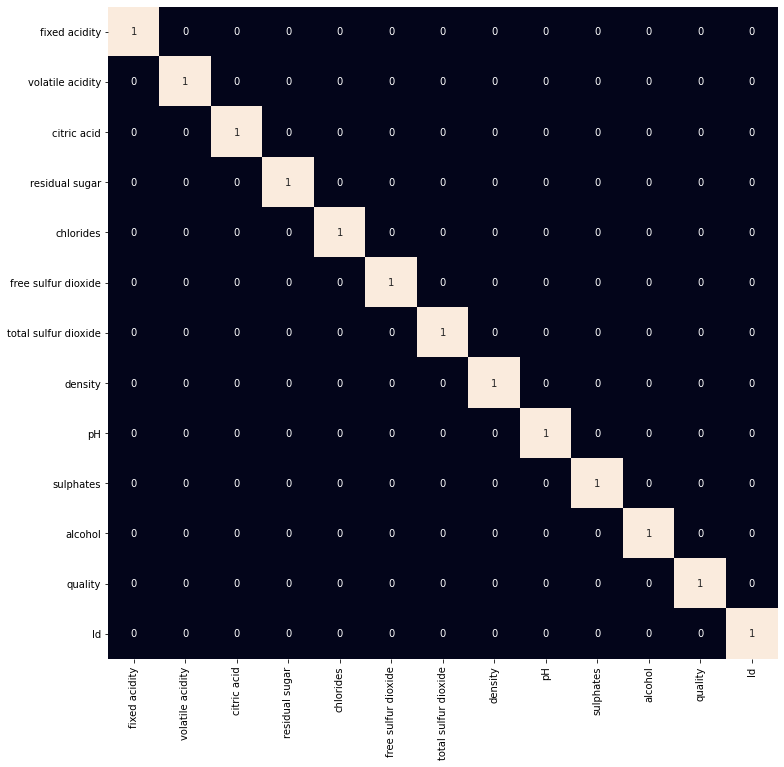

In [76]:
# draw a heatmap to check the highly correlated features
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()

From the above heat map we can conclude that there are no highly correlated features to remove

## Model Development

Let's prepare our data for training and then splitting the data into training and validation data so that we can select which model's performance is best as per the use case. We will train some of the Machine Learning classification models and then select best out of them using validation data.

In [77]:
# creating a new column best quality of object data type from existing quality column
# fill it with 0 and 1 as there are only two categories
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

In [78]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,best quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,0


After segregating the features and target variable from the dataset we will split it into 80:20 ratio for model selection

In [79]:
features = df.drop(['quality', 'best quality'], axis = 1)
target = df['best quality']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=40)

In [81]:
X_train.shape, X_test.shape

((914, 12), (229, 12))

In [82]:
y_train.shape, y_test.shape

((914,), (229,))

Normalising the data before training help us to achieve stable and fast training of the model.

In [83]:
norm = MinMaxScaler()
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)

In [84]:
# Data is fully prepared so now start modelling
models = [LogisticRegression(), XGBClassifier(), SVC(kernel = 'rbf')]

In [85]:
# Accuracy of the model for training and validation data
for i in range(3):
    models[i].fit(X_train, y_train)
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(y_train, models[i].predict(X_train)))
    print('Validation Accuracy : ', metrics.roc_auc_score(y_test, models[i].predict(X_test)))
    print()

LogisticRegression() : 
Training Accuracy :  0.7573006134969325
Validation Accuracy :  0.7523430178069354

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.796001249609497

SVC() : 
Training Accuracy :  0.7709009984361843
Validation Accuracy : 

## Model Evaluation
From the above accuracies we can say that Logistic Regression and SVC() classifier performing better on the validation data with less difference between the validation and training data. 

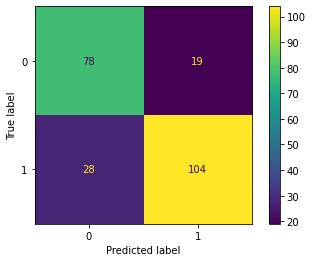

In [86]:
# plot the confusion matrix for the validation data using the Logistic Regression model
metrics.plot_confusion_matrix(models[1], X_test, y_test)
plt.show()

In [87]:
# print the classification report for the best performing model
print(metrics.classification_report(y_test, models[1].predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        97
           1       0.85      0.79      0.82       132

    accuracy                           0.79       229
   macro avg       0.79      0.80      0.79       229
weighted avg       0.80      0.79      0.80       229

